### Flow:
1. 取得資料
2. 切分資料集為訓練、測試
3. 檢視訓練資料
4. 清理與準備訓練資料
5. 訓練與選擇模型
6. 調整模型
7. 驗證與解釋模型
8. 發佈模型

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib

## 1. 取得資料

In [3]:
URL = "http://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

urllib.request.urlretrieve(URL, "housing.csv")

('housing.csv', <http.client.HTTPMessage at 0x12778cb60>)

In [4]:
data = pd.read_csv("housing.csv")

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


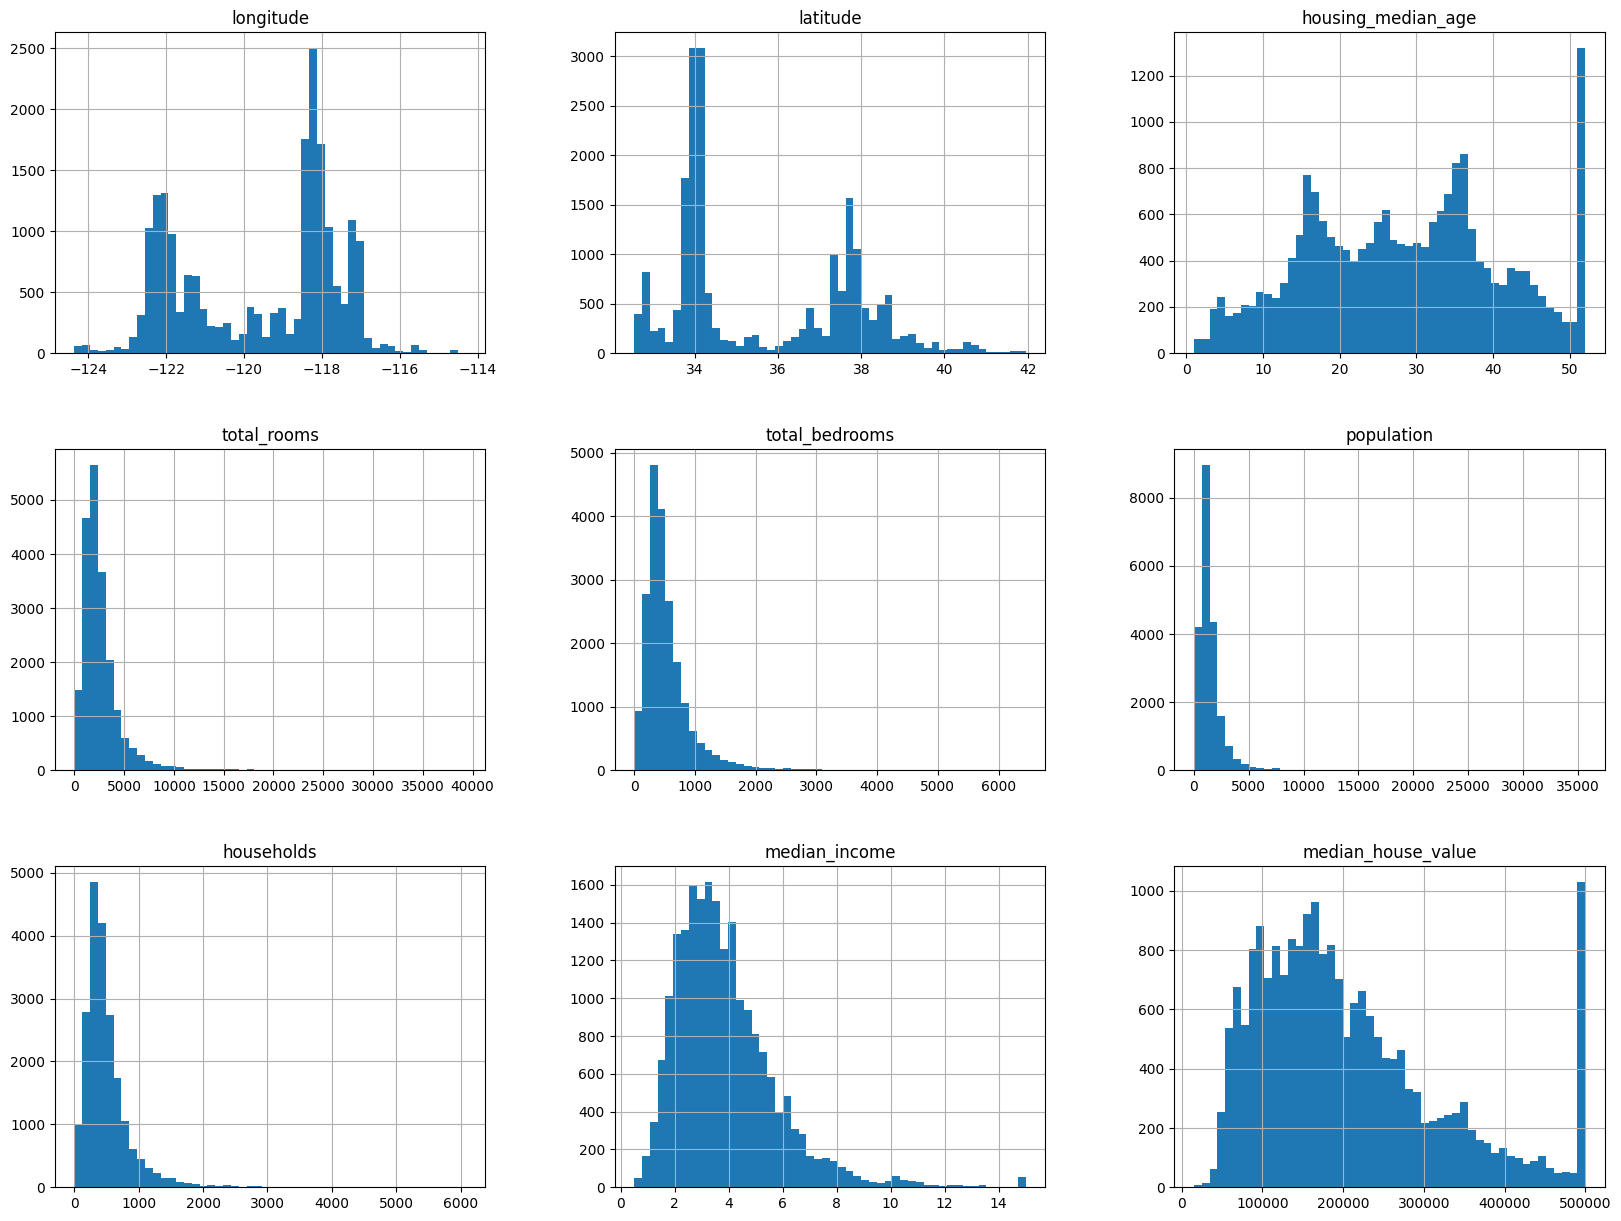

In [11]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## 2. 切分資料集為訓練、測試

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [21]:
train_set[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN


## 3. 檢視訓練資料

### 3-1. 地理資料視覺化

In [22]:
import matplotlib.image as mpimg

MPIMG_URL = "http://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png"
urllib.request.urlretrieve(MPIMG_URL, "california.png")
img = mpimg.imread("california.png")

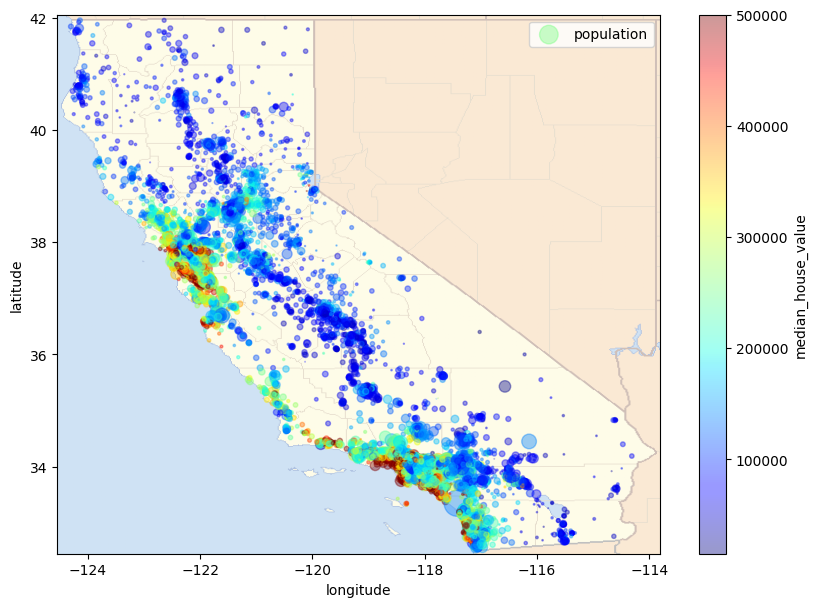

In [29]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=train_set["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.show()

### 3-2. 相關性分析

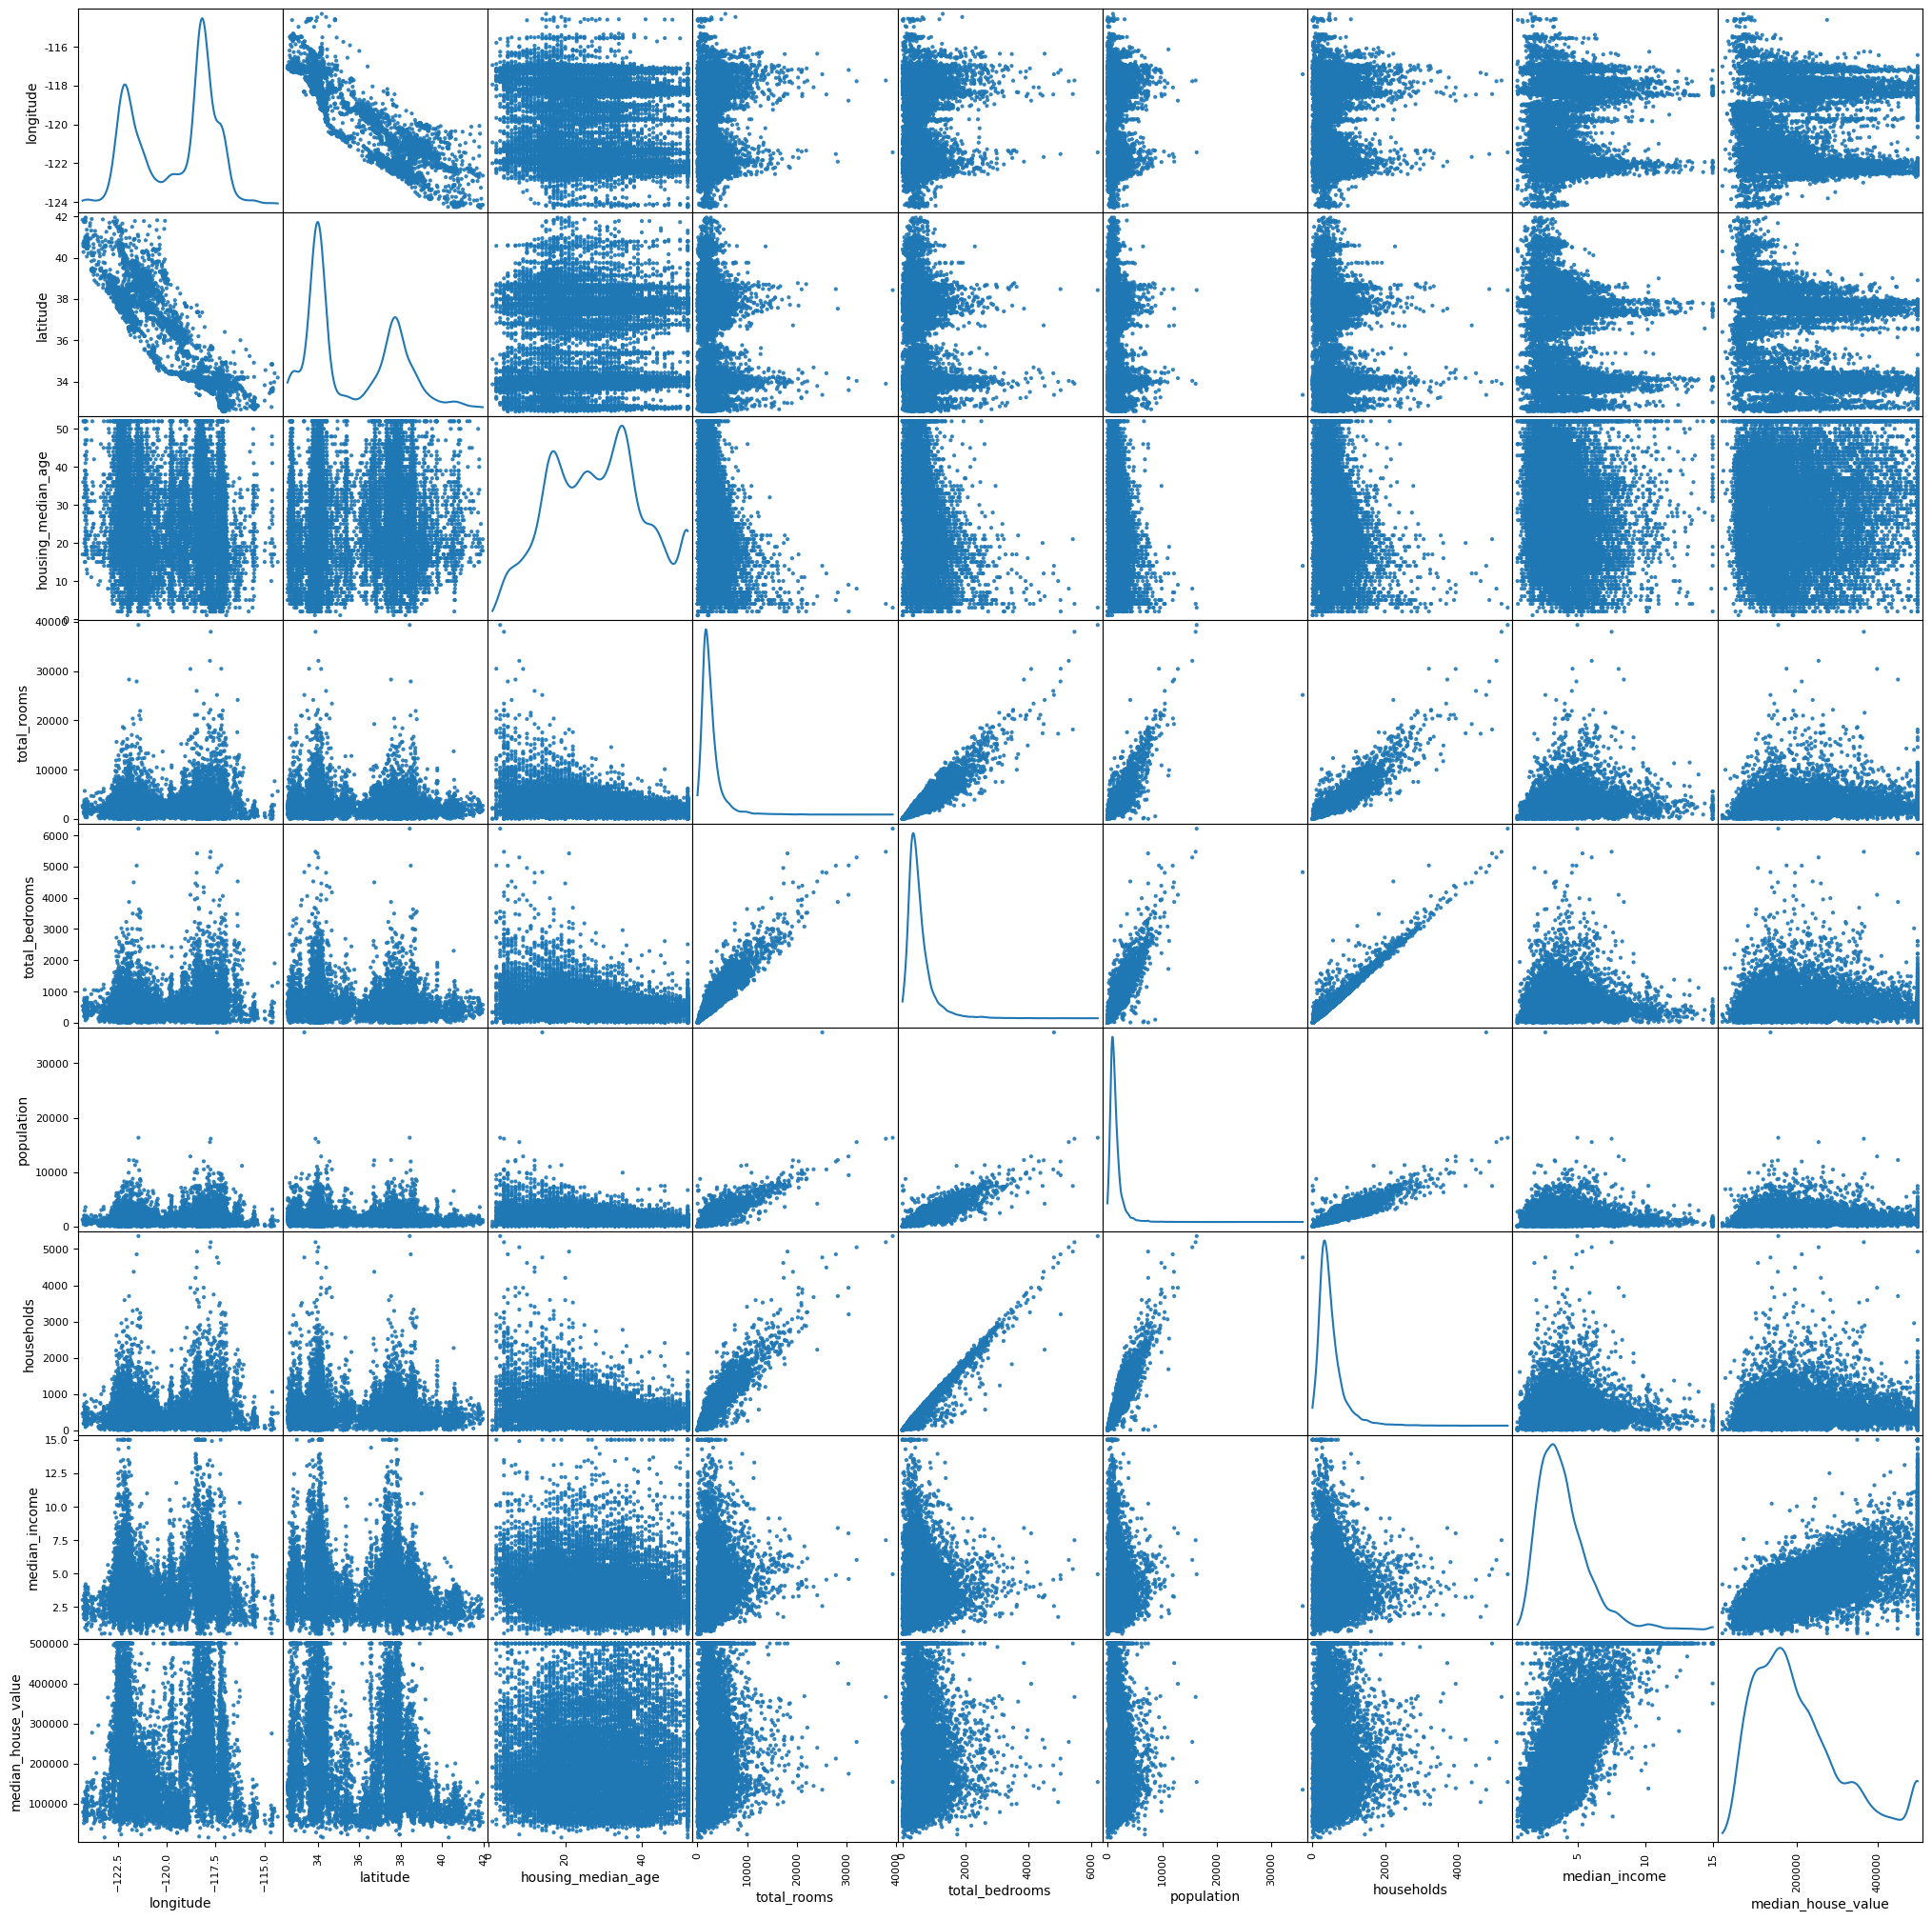

In [32]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set, figsize=(25, 25), alpha=0.9, diagonal="kde", marker=".")

plt.show()

In [34]:
corr = train_set.corr(numeric_only = True)
corr.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688194
total_rooms           0.135514
housing_median_age    0.105758
households            0.066801
total_bedrooms        0.050560
population           -0.023884
longitude            -0.050893
latitude             -0.139374
Name: median_house_value, dtype: float64

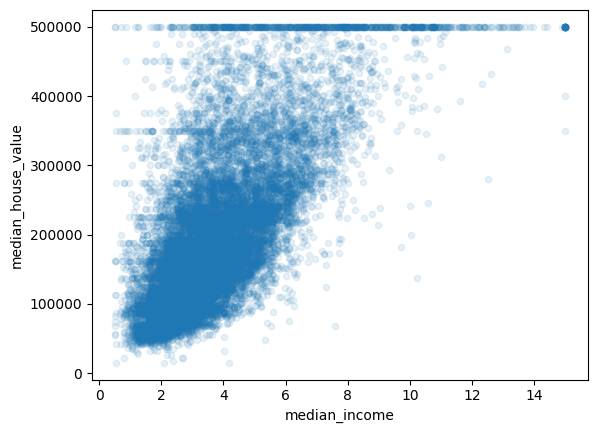

In [35]:
train_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

## 4. 清理與準備訓練資料

In [40]:
x_train = train_set.drop("median_house_value", axis=1)
y_train = train_set.median_house_value.copy()

### (4-1. 遺失值處理)

In [41]:
x_train_num = x_train.drop("ocean_proximity", axis=1)

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
x_train_num_imputed = imputer.fit_transform(x_train_num)
imputer.statistics_


array([-118.49   ,   34.26   ,   29.     , 2127.     ,  435.     ,
       1164.     ,  410.     ,    3.54455])

### (4-2. 類別變數處理)

In [43]:
x_train_cat = x_train[["ocean_proximity"]]
x_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7341
INLAND             5193
NEAR OCEAN         2136
NEAR BAY           1837
ISLAND                5
Name: count, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
x_train_cat_onehot = onehotencoder.fit_transform(x_train_cat)
x_train_cat_onehot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
onehotencoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 4-3. 準備訓練資料

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

pip_num = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

pip_full = ColumnTransformer([
    ("num", pip_num, list(x_train)[:8]),
    ("cat", OneHotEncoder(), [list(x_train)[-1]])
])

# ColumnTransformer: 逐個欄位做轉換，這邊 pip_full 會將數值欄位做 imputer 和 standard scaler，類別欄位做 onehot encoding

In [52]:
x_train_prep = pip_full.fit_transform(x_train)
x_train_prep.shape

# 變成 13 的 feature 是因為 8 個數值欄位 + 5 個 onehot encoding 的類別欄位

(16512, 13)

## 5.  訓練與選擇模型

### (5-1. 不使用交叉驗證)
#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_prep, y_train)
lin_reg.score(x_train_prep, y_train)

0.6470894622835801

#### DecisionTreeRegression

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prep, y_train)
tree_reg.score(x_train_prep, y_train)

1.0

#### RandomForestRegression

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_prep, y_train)
forest_reg.score(x_train_prep, y_train)

0.9753304298398474

### 5-2. 使用交叉驗證來做好更的評估

In [56]:
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [59]:
lin_reg = LinearRegression()
lin_reg_score = cross_val_score(lin_reg, x_train_prep, y_train, cv=10, scoring="r2")
lin_reg_score, lin_reg_score.mean(), lin_reg_score.std()

(array([0.62314624, 0.65645997, 0.65711307, 0.65414083, 0.6178338 ,
        0.6530729 , 0.66435526, 0.64860335, 0.6389309 , 0.63803862]),
 0.6451694956087585,
 0.014543006952548973)

#### DecisionTreeRegression

In [60]:
decision_tree = DecisionTreeRegressor()
decision_tree_score = cross_val_score(decision_tree, x_train_prep, y_train, cv=10, scoring="r2")
decision_tree_score, decision_tree_score.mean(), decision_tree_score.std()

(array([0.60554259, 0.63869854, 0.66674937, 0.68263321, 0.637384  ,
        0.63860522, 0.65382413, 0.65208273, 0.64956285, 0.70019024]),
 0.6525272863640891,
 0.024925886605207698)

#### RandomForestRegression

In [61]:
random_forest = RandomForestRegressor()
random_forest_score = cross_val_score(random_forest, x_train_prep, y_train, cv=10, scoring="r2")
random_forest_score, random_forest_score.mean(), random_forest_score.std()

(array([0.81033486, 0.81914332, 0.83816777, 0.82389125, 0.80624398,
        0.82453636, 0.83081405, 0.81541354, 0.81088521, 0.82141238]),
 0.8200842706887503,
 0.009338884340615536)

## 6. 調整模型

### 6-1. Random Search

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [63]:
param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8)
}

random_forest = RandomForestRegressor()
random_search = RandomizedSearchCV(random_forest, param_distributions=param_distribs, n_iter=10, cv=5, scoring="r2", random_state=1)

random_search.fit(x_train_prep, y_train)
random_search.best_params_

{'max_features': 6, 'n_estimators': 141}

In [65]:
result = random_search.cv_results_

for mean_score, params in zip(result["mean_test_score"], result["params"]):
    print(mean_score, params)

0.8201299058881674 {'max_features': 6, 'n_estimators': 141}
0.7846783050063787 {'max_features': 1, 'n_estimators': 138}
0.8156856172690066 {'max_features': 4, 'n_estimators': 134}
0.7849919288374005 {'max_features': 1, 'n_estimators': 145}
0.799626420073497 {'max_features': 2, 'n_estimators': 72}
0.8190867045841385 {'max_features': 6, 'n_estimators': 135}
0.8026384473287334 {'max_features': 2, 'n_estimators': 179}
0.8172460615309483 {'max_features': 5, 'n_estimators': 102}
0.8118618262855218 {'max_features': 3, 'n_estimators': 140}
0.8177234381697327 {'max_features': 5, 'n_estimators': 157}


### 6-2. 選擇最佳模型

In [66]:
best_model = random_search.best_estimator_

## 7. 驗證與解釋模型

### 7-1. 驗證模型

In [67]:
x_test = test_set.drop("median_house_value", axis=1)
y_test = test_set.median_house_value.copy()

x_test_prep = pip_full.transform(x_test)
best_model.score(x_test_prep, y_test)

0.8245144672729182

### 7-2. 解釋模型

In [68]:
imp = best_model.feature_importances_
imp

array([1.22928992e-01, 1.09759804e-01, 4.57608607e-02, 3.74042758e-02,
       3.01338982e-02, 4.50039867e-02, 2.70873304e-02, 4.07837549e-01,
       1.66225472e-02, 1.46194803e-01, 2.54457993e-04, 3.53652715e-03,
       7.47496629e-03])

In [69]:
cat_one_hot_attribs = list(pip_full.named_transformers_["cat"].categories_[0])
features = list(x_train)[:8] + cat_one_hot_attribs
sorted(zip(imp, features), reverse=True)

[(0.4078375491804442, 'median_income'),
 (0.1461948034617195, 'INLAND'),
 (0.12292899244071337, 'longitude'),
 (0.10975980440056109, 'latitude'),
 (0.04576086072524267, 'housing_median_age'),
 (0.045003986676690186, 'population'),
 (0.0374042757883974, 'total_rooms'),
 (0.03013389823064307, 'total_bedrooms'),
 (0.027087330443266104, 'households'),
 (0.01662254722140474, '<1H OCEAN'),
 (0.0074749662916461694, 'NEAR OCEAN'),
 (0.0035365271461560857, 'NEAR BAY'),
 (0.00025445799311546024, 'ISLAND')]

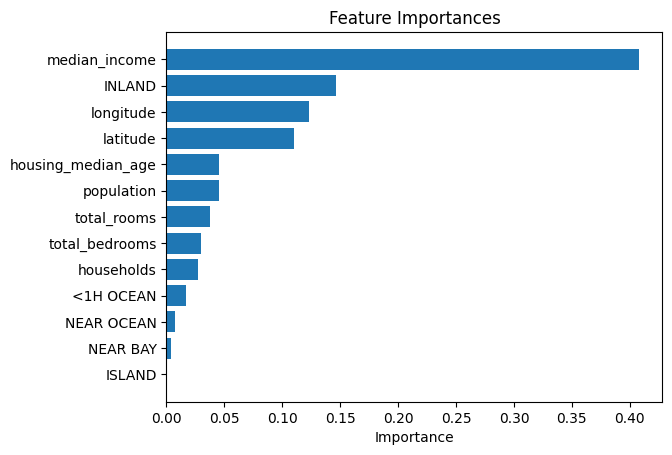

In [70]:
ind = np.argsort(imp)
plt.title("Feature Importances")
plt.barh(range(len(imp)), imp[ind], align="center")
plt.yticks(range(len(imp)), np.array(features)[ind])
plt.xlabel("Importance")
plt.show()

## 8. 發佈模型

### 8-1. 最終模型整合

In [78]:
pip_final = Pipeline([
    ("preparation", pip_full),
    ("linear", best_model)
])

pip_full.fit(x_train, y_train)

final_model = pip_final

In [79]:
final_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linear',
                 RandomForestRegressor(max_features=6, n_estimators=141))])

### 8-2. 儲存最終模型

In [80]:
import joblib

joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

### 8-3. 讀取與使用模型

In [81]:
model_loaded = joblib.load("final_model.pkl")

model_loaded

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linear',
                 RandomForestRegressor(max_features=6, n_estimators=141))])

In [83]:
model_loaded.predict(x_test)

array([317707.19858156,  62451.77304965, 243958.87234043, ...,
       327486.58156028, 224792.19858156, 116287.23404255])